In [ ]:
# Retail EDA Notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [4]:
df = pd.read_csv("cleaned_retail_data.csv")
df.head()


,date,store_id,product_id,units_sold,revenue,store_name,city,product_name,category
0,2023-01-01,S1,P1,120,24000,Central Mall Store,Mumbai,Smartphone,Electronics
1,2023-01-02,S1,P2,80,16000,Central Mall Store,Mumbai,Headphones,Accessories
2,2023-01-03,S2,P1,90,18000,City Center Store,Delhi,Smartphone,Electronics
3,2023-01-04,S2,P3,60,30000,City Center Store,Delhi,Laptop,Electronics
4,2023-01-05,S3,P2,110,22000,Metro Plaza Store,Bangalore,Headphones,Accessories


In [5]:
df.describe()


,units_sold,revenue
count,20.000000,20.000000
mean,147.250000,41600.000000
std,52.452359,26521.887684
min,60.000000,16000.000000
25%,105.000000,27500.000000
50%,155.000000,34500.000000
75%,182.500000,42500.000000
max,240.000000,120000.000000


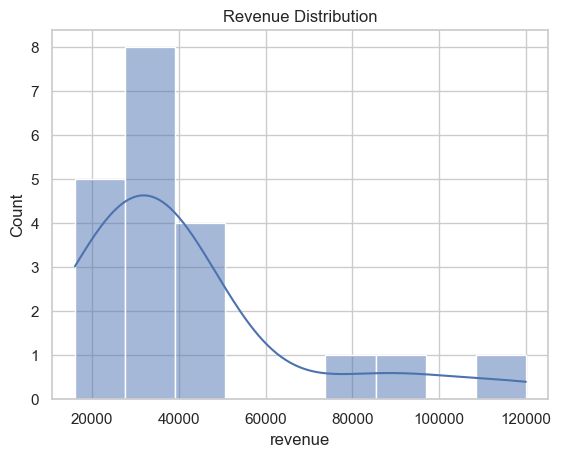

In [6]:
sns.histplot(df['revenue'], kde=True)
plt.title("Revenue Distribution")
plt.show()


In [7]:
df.groupby('store_name')['revenue'].sum().sort_values(ascending=False)


store_name
Metro Plaza Store     342000
Central Mall Store    261000
City Center Store     229000
Name: revenue, dtype: int64

In [8]:
df.groupby('product_name')['revenue'].sum().sort_values(ascending=False)


product_name
Laptop        405000
Smartphone    230000
Headphones    197000
Name: revenue, dtype: int64

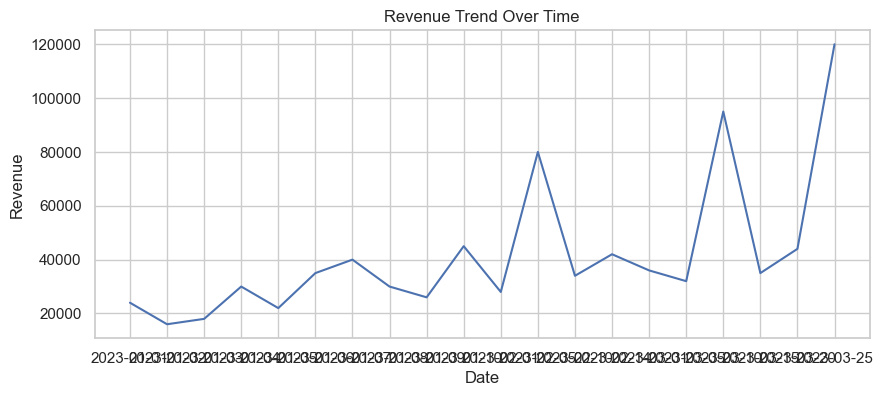

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['revenue'])
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


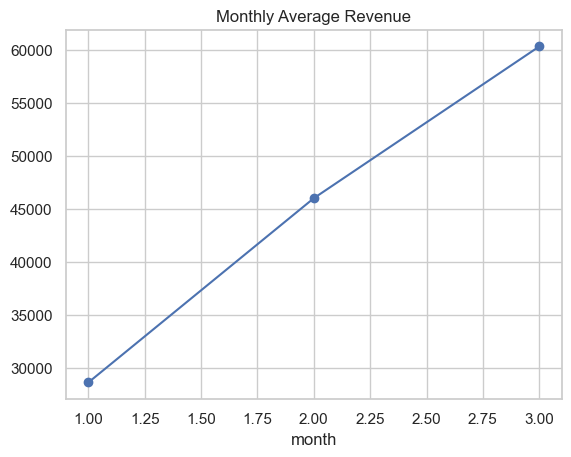

In [10]:
df['month'] = pd.to_datetime(df['date']).dt.month

df.groupby('month')['revenue'].mean().plot(marker='o')
plt.title("Monthly Average Revenue")
plt.show()


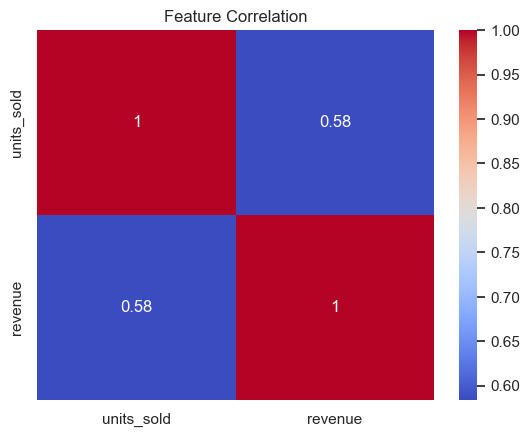

In [13]:
sns.heatmap(
    df[['units_sold', 'revenue']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation")
plt.show()


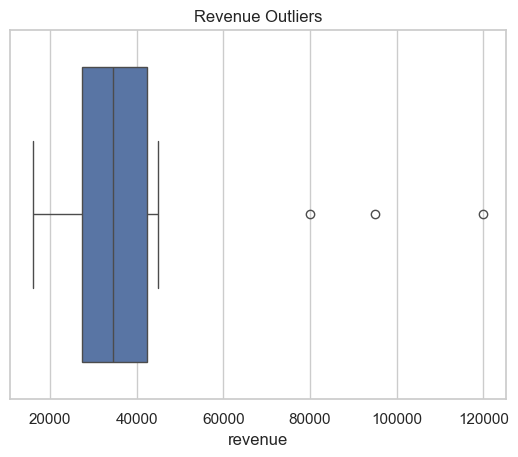

In [14]:
sns.boxplot(x=df['revenue'])
plt.title("Revenue Outliers")
plt.show()


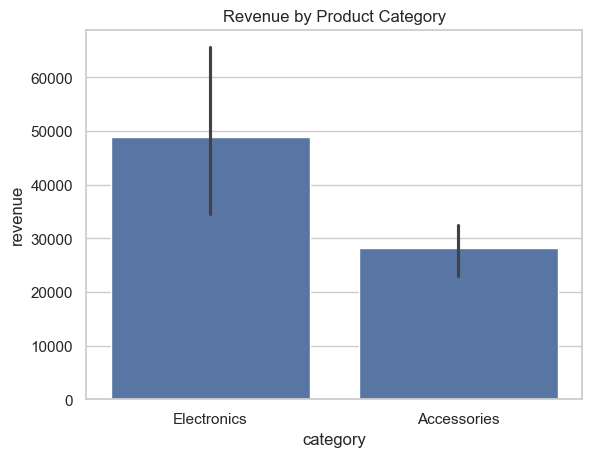

In [15]:
sns.barplot(x='category', y='revenue', data=df)
plt.title("Revenue by Product Category")
plt.show()


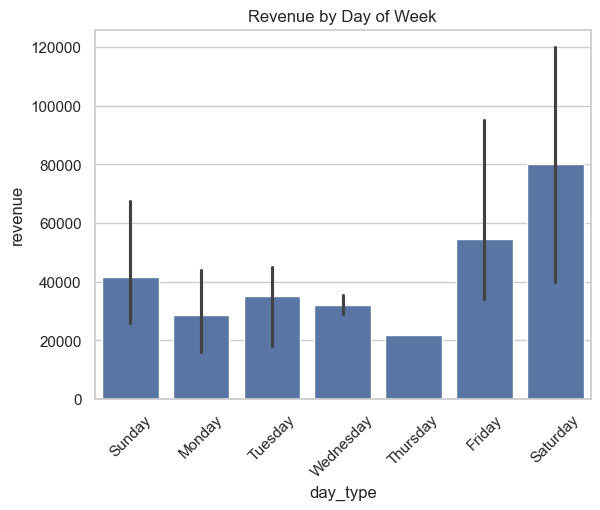

In [20]:
df['date'] = pd.to_datetime(df['date'])


df['day_type'] = df['date'].dt.day_name()

sns.barplot(x='day_type', y='revenue', data=df)
plt.xticks(rotation=45)
plt.title("Revenue by Day of Week")
plt.show()

